In [5]:
import json
import pandas as pd
import numpy as np
import re
from sqlalchemy import create_engine
import time

In [6]:
Hum_telo_df = pd.read_csv("../Human_Data/Human_TELOMERES.csv")

In [7]:
Hum_telo_df = Hum_telo_df.replace(' ', 0)

In [8]:
df = pd.read_csv("../Human_Data/Human_BioMarkers.csv")

In [9]:
df = df.replace(' ', 0)

In [10]:
df["LA068M"][0]

0

In [11]:
df["LA068M"].value_counts()

0     16757
5       101
3        84
7        55
2        53
9        49
4        46
8        25
1        22
6        22
11        3
Name: LA068M, dtype: int64

In [12]:
sen_df = pd.read_csv("../Bird_Data/Bird_Data.csv")

In [13]:
dummies_df = pd.get_dummies(sen_df["AgeClass"])
dummies_df

merged_df = pd.merge(sen_df,dummies_df, how='inner', left_index=True, right_index=True)

In [14]:
merged_df.drop("AgeClass", axis=1)

,Collection_Num,BirdID,Sex,AgeY,BirthFPID,U_PlateID,RTL,Technician,Terr,FPID,...,MAC,PAC,BrF,BrM,A,CH,FL,J,OFL,SA
0,1,5511,0,0.246575,103,9_3,1.06,1,10.0,104,...,3.920548,7.443836,4863,1762,0,0,0,1,0,0
1,2,5559,1,3.597260,103,9_1,0.52,1,77.1,122,...,7.416438,6.235616,1716,4892,1,0,0,0,0,0
2,3,5559,1,4.715068,103,9_28,1.07,1,77.1,125,...,7.416438,6.235616,1716,4892,1,0,0,0,0,0
3,4,5559,1,0.657534,103,9_2,0.99,1,111.0,104,...,7.416438,6.235616,1716,4892,0,0,0,0,0,1
4,5,5527,1,0.328767,103,9_3,1.02,1,131.0,104,...,3.452055,7.778082,1707,1710,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,2658,221,1,6.958904,8,2_1,1.99,2,32.0,19,...,0.000000,0.000000,0,0,1,0,0,0,0,0
2658,2659,216,1,8.947945,8,8_8,1.18,1,37.0,22,...,0.000000,0.000000,0,0,1,0,0,0,0,0
2659,2660,176,1,6.772603,8,7_32,0.93,1,46.0,19,...,0.000000,0.000000,0,0,1,0,0,0,0,0
2660,2661,221,1,9.090411,8,1_12,0.90,2,32.0,22,...,0.000000,0.000000,0,0,1,0,0,0,0,0


In [15]:
group_df = merged_df.groupby(['BirdID']).median()

In [16]:
group_df["RTL"].corr(group_df["AgeY"])

-0.11224376355008879

<AxesSubplot:>

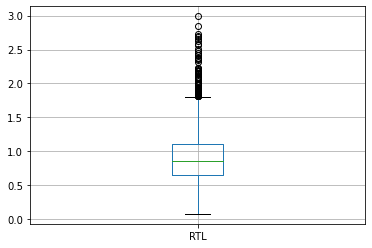

In [17]:
merged_df.boxplot(column=["RTL"])

In [18]:
merged_df["RTL"].count()

2662

In [19]:
Cut_Outlier_df = merged_df.loc[merged_df["RTL"] < 1.8]

In [20]:
Cut_Outlier_df.columns

Index(['Collection_Num', 'BirdID', 'Sex', 'AgeY', 'AgeClass', 'BirthFPID',
       'U_PlateID', 'RTL', 'Technician', 'Terr', 'FPID', 'mum', 'dad', 'MAC',
       'PAC', 'BrF', 'BrM', 'A', 'CH', 'FL', 'J', 'OFL', 'SA'],
      dtype='object')

In [21]:
# Segment the features from the target
y = Cut_Outlier_df["AgeY"]
X = Cut_Outlier_df.drop(["AgeY", "BirdID", "Collection_Num", "U_PlateID", "Technician", "AgeClass", 'Terr', 'FPID', 'mum', 'dad', 'MAC', 'PAC', 'BrF', 'BrM', 'A', 'CH', 'FL', 'J', 'OFL', 'SA'], axis=1)

In [22]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(1925, 3)

In [23]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
model = LinearRegression()
model2 = LogisticRegression()

In [24]:
# Fit the data
model.fit(X_train, y_train)

LinearRegression()

In [25]:
precict = model.predict(X_test)

In [26]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, precict))

1.9900399045781239


In [27]:
Cut_Outlier_df.count()

Collection_Num    2567
BirdID            2567
Sex               2567
AgeY              2567
AgeClass          2567
BirthFPID         2567
U_PlateID         2567
RTL               2567
Technician        2567
Terr              2567
FPID              2567
mum               2567
dad               2567
MAC               2567
PAC               2567
BrF               2567
BrM               2567
A                 2567
CH                2567
FL                2567
J                 2567
OFL               2567
SA                2567
dtype: int64

In [28]:
Cut_Outlier_df["RTL"].corr(Cut_Outlier_df["AgeY"])

-0.1373794674783896

In [31]:
import psycopg2


#establishing the connection
conn = psycopg2.connect(
   database="Senescence_DB", user='postgres', password="Bootcamp2021", host='127.0.0.1', port= '5432'
)

#Setting auto commit false
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Retrieving data
cursor.execute('''SELECT * from human_age_vs_telo''')

#Fetching 1st row from the table
result_df = pd.DataFrame(cursor.fetchall(), columns=["ID", "Age", "RTL"]);
print(result_df)

# #Fetching 1st row from the table
# result = cursor.fetchall();
# print(result)

#Commit your changes in the database
conn.commit()

#Closing the connection
conn.close()

        ID  Age       RTL
0     3788    0  1.391172
1     5256   26  1.437122
2     3142   28  1.986101
3     5655   32  1.309313
4     3291   33  1.269499
...    ...  ...       ...
5803  4159   97  1.156437
5804  3884   97  1.233160
5805  4210   99  1.380837
5806  3755  100  1.124706
5807  2661  107  1.054936

[5808 rows x 3 columns]


In [32]:
result_df["RTL"].corr(result_df["Age"])

-0.05366521909317336

<AxesSubplot:>

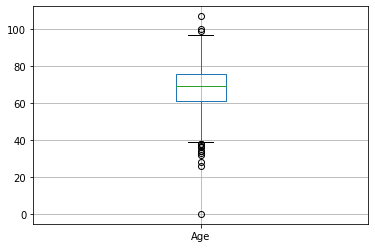

In [41]:
result_df.boxplot(column=["Age"])

In [42]:
NoOutlier_df = result_df.loc[result_df["RTL"]<3]
NoOutlier_df = NoOutlier_df.loc[NoOutlier_df["RTL"]>.05]
NoOutlier_df = NoOutlier_df.loc[NoOutlier_df["Age"]>38]
NoOutlier_df = NoOutlier_df.loc[NoOutlier_df["Age"]<95]

In [43]:
NoOutlier_df.count()

ID     5700
Age    5700
RTL    5700
dtype: int64

In [44]:
NoOutlier_df["RTL"].corr(NoOutlier_df["Age"])

-0.1567199501885514